In [1]:
import pandas as pd

In [2]:
from xgboost import XGBClassifier # kaggle에서 5년 연속 1위 븐류모델-> epoch돌때마다 손실값 뜸
from xgboost import plot_importance 

In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [4]:
from scipy.stats import uniform, randint, loguniform

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

# chart_in_out분류

In [6]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
x_train.shape, x_test.shape

((987, 16), (247, 16))

In [17]:
from xgboost import XGBClassifier # kaggle에서 5년 연속 1위 븐류모델-> epoch돌때마다 손실값 뜸
from xgboost import plot_importance

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [8]:
from scipy.stats import randint, uniform, loguniform

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

## ohe사용

# 3년치 단위로 가져오기

In [197]:
ddf=pd.read_csv('./final_chart_in_out.csv',encoding='utf-8-sig')
ddf

,artist_song,genre,like,camelot,bpm,energy,danceability,acousticness,year_y,classes
0,지코 (ZICO) 아무노래,랩/힙합,164968,3A,108,79,87.0,12.0,2020.0,0
1,창모 (CHANGMO) METEOR,랩/힙합,136317,4B,186,64,73.0,32.0,2020.0,0
2,조정석 아로하,발라드,18508,10B,99,60,67.0,40.0,2020.0,0
3,장범준 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,록/메탈,98921,1B,100,77,67.0,32.0,2020.0,0
4,아이유 에잇(Prod.&Feat. SUGA of BTS),록/메탈,725830,3B,120,87,68.0,12.0,2020.0,0
...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),인디음악,256554,9A,63,67,26.0,0.0,2024.0,1
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),댄스,6389,1A,179,48,52.0,23.0,2024.0,1
1231,연변대학최씨 바람이 불지 않은 것처럼,발라드,608,1A,170,66,55.0,81.0,2024.0,1
1232,츄 (CHUU) Strawberry Rush,댄스,11807,10B,158,84,59.0,15.0,2024.0,1


In [198]:
ddf['year_y']=ddf['year_y'].astype('int')
ddf

,artist_song,genre,like,camelot,bpm,energy,danceability,acousticness,year_y,classes
0,지코 (ZICO) 아무노래,랩/힙합,164968,3A,108,79,87.0,12.0,2020,0
1,창모 (CHANGMO) METEOR,랩/힙합,136317,4B,186,64,73.0,32.0,2020,0
2,조정석 아로하,발라드,18508,10B,99,60,67.0,40.0,2020,0
3,장범준 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,록/메탈,98921,1B,100,77,67.0,32.0,2020,0
4,아이유 에잇(Prod.&Feat. SUGA of BTS),록/메탈,725830,3B,120,87,68.0,12.0,2020,0
...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),인디음악,256554,9A,63,67,26.0,0.0,2024,1
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),댄스,6389,1A,179,48,52.0,23.0,2024,1
1231,연변대학최씨 바람이 불지 않은 것처럼,발라드,608,1A,170,66,55.0,81.0,2024,1
1232,츄 (CHUU) Strawberry Rush,댄스,11807,10B,158,84,59.0,15.0,2024,1


In [199]:
ddf=ddf[ddf['year_y'].isin([2024,2023,2022])]
np.unique(ddf['year_y'],return_counts=True)

(array([2022, 2023, 2024]), array([144, 182, 288], dtype=int64))

In [200]:
np.unique(ddf['classes'],return_counts=True)

(array([0, 1], dtype=int64), array([290, 324], dtype=int64))

In [201]:
df=pd.get_dummies(ddf,columns=['genre'],drop_first=True,dtype='int')
df

,artist_song,like,camelot,bpm,energy,danceability,acousticness,year_y,classes,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스
193,IVE (아이브) LOVE DIVE,122601,12A,118,71,70.0,0.0,2022,0,0,1,0,0,0,0,0,0
194,i-dle (아이들) TOMBOY,143106,12A,124,87,76.0,1.0,2022,0,0,0,0,1,0,0,0,0
195,김민석 취중고백,21014,1B,122,45,56.0,58.0,2022,0,0,0,0,0,1,0,0,0
196,멜로망스 사랑인가 봐,88639,4B,172,73,40.0,51.0,2022,0,0,0,0,0,1,0,0,0
197,임영웅 사랑은 늘 도망가,147432,4B,131,44,40.0,65.0,2022,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),256554,9A,63,67,26.0,0.0,2024,1,0,0,0,0,0,0,1,0
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),6389,1A,179,48,52.0,23.0,2024,1,0,1,0,0,0,0,0,0
1231,연변대학최씨 바람이 불지 않은 것처럼,608,1A,170,66,55.0,81.0,2024,1,0,0,0,0,1,0,0,0
1232,츄 (CHUU) Strawberry Rush,11807,10B,158,84,59.0,15.0,2024,1,0,1,0,0,0,0,0,0


In [202]:
df=pd.get_dummies(df,columns=['camelot'],drop_first=True,dtype='int')
df.columns

Index(['artist_song', 'like', 'bpm', 'energy', 'danceability', 'acousticness',
       'year_y', 'classes', 'genre_기타', 'genre_댄스', 'genre_랩/힙합', 'genre_록/메탈',
       'genre_발라드', 'genre_성인가요/트로트', 'genre_인디음악', 'genre_포크/블루스',
       'camelot_10B', 'camelot_11A', 'camelot_11B', 'camelot_12A',
       'camelot_12B', 'camelot_1A', 'camelot_1B', 'camelot_2A', 'camelot_2B',
       'camelot_3A', 'camelot_3B', 'camelot_4A', 'camelot_4B', 'camelot_5A',
       'camelot_5B', 'camelot_6A', 'camelot_6B', 'camelot_7A', 'camelot_7B',
       'camelot_8A', 'camelot_8B', 'camelot_9A', 'camelot_9B'],
      dtype='object')

In [203]:
df['target']=df['classes']
df.drop(columns=['year_y','classes'],inplace=True)


In [204]:
df['target']

193     0
194     0
195     0
196     0
197     0
       ..
1229    1
1230    1
1231    1
1232    1
1233    1
Name: target, Length: 614, dtype: int64

In [205]:
df.loc[df['target'] == 0, 'target'] = 99 
df.loc[df['target'] == 1, 'target'] = 0   
df.loc[df['target'] == 99, 'target'] = 1
df['target']

193     1
194     1
195     1
196     1
197     1
       ..
1229    0
1230    0
1231    0
1232    0
1233    0
Name: target, Length: 614, dtype: int64

In [206]:
np.unique(df['target'],return_counts=True)

(array([0, 1], dtype=int64), array([324, 290], dtype=int64))

In [66]:
df['target']

193     1
194     1
195     1
196     1
197     1
       ..
1229    0
1230    0
1231    0
1232    0
1233    0
Name: target, Length: 614, dtype: int64

In [207]:
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [214]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([265, 226], dtype=int64))

In [215]:
265 / 226 

1.1725663716814159

# 1-1. xgboost 원핫인코딩버전

# xgboost

In [216]:
xc_ohe_3=XGBClassifier(objective='binary:logistic',eval_metric='logloss',scale_pos_weight=1.17)
params = {'colsample_bytree': [0.5, 0.7, 1], #각 트리 생성 시 사용하는 feature 비율
                      'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], #값이 낮을수록 학습이 느리지만 일반화 성능 좋음
                      'max_depth' : randint(5,15),
                      'min_child_weight' : [1, 3, 5], #자식 노드 분할을 결정하는 최소 가중치의 합 -> 작으면 더 만흥 자식 노드 분할
                      'n_estimators' : [100, 200, 300,500]}
rs_ohe_3=RandomizedSearchCV(xc_ohe_3,param_distributions=params,n_iter=300,n_jobs=-1)
rs_ohe_3.fit(x_train,y_train)
rs_ohe_3.best_params_, np.max(rs_ohe_3.cv_results_['mean_test_score'])

({'colsample_bytree': 0.7,
  'learning_rate': 0.3,
  'max_depth': 9,
  'min_child_weight': 1,
  'n_estimators': 300},
 0.7333127190270048)

In [217]:
xc_ohe_3=rs_ohe_3.best_estimator_

In [218]:
xc_ohe_3.score(x_test,y_test)

0.7154471544715447

In [219]:
y_pred_proba_3=xc_ohe_3.predict_proba(x_test)

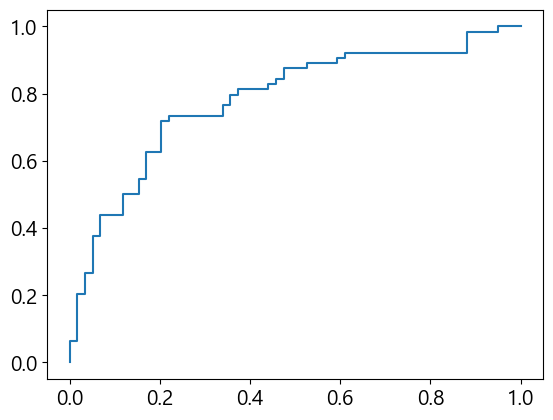

In [220]:
x,y,N=roc_curve(y_test,y_pred_proba_3[:,1])
plt.plot(x,y)

In [74]:
print('auc는: ',roc_auc_score(y_test, y_pred_proba_3[:,1]))

auc는:  0.8089103596349974


# 정규화 후 SVC사용

In [39]:
from sklearn.svm import SVC

In [228]:
df['like']=df['like'].apply(np.log1p)

In [231]:
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]

In [232]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [233]:
x_train.columns

Index(['like', 'bpm', 'energy', 'danceability', 'acousticness', 'genre_기타',
       'genre_댄스', 'genre_랩/힙합', 'genre_록/메탈', 'genre_발라드', 'genre_성인가요/트로트',
       'genre_인디음악', 'genre_포크/블루스', 'camelot_10B', 'camelot_11A',
       'camelot_11B', 'camelot_12A', 'camelot_12B', 'camelot_1A', 'camelot_1B',
       'camelot_2A', 'camelot_2B', 'camelot_3A', 'camelot_3B', 'camelot_4A',
       'camelot_4B', 'camelot_5A', 'camelot_5B', 'camelot_6A', 'camelot_6B',
       'camelot_7A', 'camelot_7B', 'camelot_8A', 'camelot_8B', 'camelot_9A',
       'camelot_9B'],
      dtype='object')

In [236]:
ss1=StandardScaler()
ss1.fit(x_train.iloc[:,1:5])
x_train.iloc[:,1:5]=ss1.transform(x_train.iloc[:,1:5])
x_test.iloc[:,1:5]=ss1.transform(x_test.iloc[:,1:5])

C:\Users\kkangwook\AppData\Local\Temp\ipykernel_5392\940807648.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.03535095  1.87649853 -0.1138796  -1.29336293  1.5816277  -0.48246814
 -0.70362126  1.10246259 -0.04016189  0.25470895 -0.15073845 -1.21964522
  0.47586207 -1.84624575 -1.8831046   0.99188603  0.32842665  0.07041467
  0.03355582 -1.25650408  0.62329749 -1.40393949 -0.55618585 -1.03535095
  0.47586207 -0.81419783  0.18099124  0.77073291 -1.40393949 -0.1875973
  0.25470895 -1.03535095  0.07041467 -0.1138796  -1.10906866  0.40214436
  0.32842665 -2.03054002  1.80278082  1.72906312 -0.33503272  1.87649853
 -0.62990356  1.65534541  2.4662402  -0.07702074 -0.29817387  0.14413238
  0.03355582 -2.50970512 -1.62509262  0.62329749 -0.92477439 -0.5930447
 -0.66676241  0.99188603  0.36528551  2.09765166 -0.33503272 -0.22445616
  0.99188603 -0.1138796  -0.66676241  2.98226416  0.03355582 -0.9984921
  2.09765166 

In [237]:
x_train.head()

,like,bpm,energy,danceability,acousticness,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,...,camelot_5A,camelot_5B,camelot_6A,camelot_6B,camelot_7A,camelot_7B,camelot_8A,camelot_8B,camelot_9A,camelot_9B
1199,10.107244,-1.035351,0.877542,0.972162,-1.070764,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,12.395374,1.876499,0.669341,-0.032482,-0.936952,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
459,13.495082,-0.113880,-0.892172,-1.288287,1.371295,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
929,11.465792,-1.293363,0.148837,-0.974336,-0.502065,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1209,9.041685,1.581628,-0.788071,-2.041770,0.267350,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 2-1 원핫인코딩버전 SVC

In [240]:
svc_ohe_3 = SVC(gamma='scale',kernel='rbf',probability=True) 
params={'C' : loguniform(0.001,1000)} # 오차허용큼(일반화용) ~ 오차허용적음(과대적합 위험, 정확도는 좋음)
                
rs_svc_ohe_3=RandomizedSearchCV(svc_ohe_3,param_distributions=params,n_iter=300,n_jobs=-1)
rs_svc_ohe_3.fit(x_train,y_train)
rs_svc_ohe_3.best_params_, np.max(rs_svc_ohe_3.cv_results_['mean_test_score'])

({'C': 16.374755646889223}, 0.7027004741290457)

In [241]:
svc_ohe_3=rs_svc_ohe_3.best_estimator_
svc_ohe_3.score(x_test,y_test)

0.7154471544715447

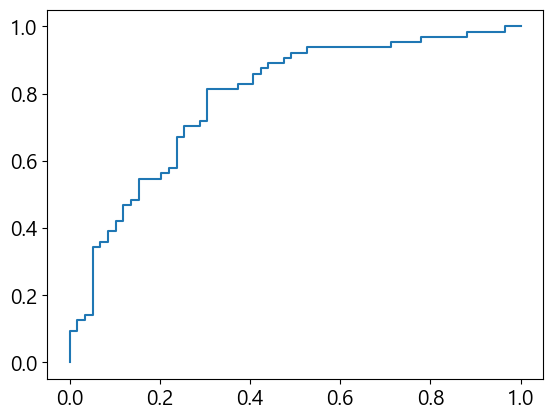

In [242]:
svc_y_pred_proba_3=svc_ohe_3.predict_proba(x_test)
x,y,N=roc_curve(y_test,svc_y_pred_proba_3[:,1])
plt.plot(x,y)

In [243]:
print('auc는: ',roc_auc_score(y_test, svc_y_pred_proba_3[:,1]))

auc는:  0.7870762711864406


# cos-sin인코딩하기

# xgboost

In [244]:
df=pd.read_csv('./final_chart_in_out.csv',encoding='utf-8')
df

,artist_song,genre,like,camelot,bpm,energy,danceability,acousticness,year_y,classes
0,지코 (ZICO) 아무노래,랩/힙합,164968,3A,108,79,87.0,12.0,2020.0,0
1,창모 (CHANGMO) METEOR,랩/힙합,136317,4B,186,64,73.0,32.0,2020.0,0
2,조정석 아로하,발라드,18508,10B,99,60,67.0,40.0,2020.0,0
3,장범준 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,록/메탈,98921,1B,100,77,67.0,32.0,2020.0,0
4,아이유 에잇(Prod.&Feat. SUGA of BTS),록/메탈,725830,3B,120,87,68.0,12.0,2020.0,0
...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),인디음악,256554,9A,63,67,26.0,0.0,2024.0,1
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),댄스,6389,1A,179,48,52.0,23.0,2024.0,1
1231,연변대학최씨 바람이 불지 않은 것처럼,발라드,608,1A,170,66,55.0,81.0,2024.0,1
1232,츄 (CHUU) Strawberry Rush,댄스,11807,10B,158,84,59.0,15.0,2024.0,1


In [91]:
def camelot_sin(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.sin(angle)
def camelot_cos(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.cos(angle)
def number(x):
    return int(x[:-1])
def get_str(x):
    return 0 if x[-1]=='A' else 1

In [245]:
df['camelot_sin']=np.round(df['camelot'].apply(number).apply(camelot_sin),2)
df['camelot_cos']=np.round(df['camelot'].apply(number).apply(camelot_cos),2)
df['camelot_AB']=df['camelot'].apply(get_str)

In [140]:
df

,artist_song,genre,like,camelot,bpm,energy,danceability,acousticness,year_y,classes,camelot_sin,camelot_cos,camelot_AB
0,지코 (ZICO) 아무노래,랩/힙합,164968,3A,108,79,87.0,12.0,2020.0,0,0.87,0.5,0
1,창모 (CHANGMO) METEOR,랩/힙합,136317,4B,186,64,73.0,32.0,2020.0,0,1.00,0.0,1
2,조정석 아로하,발라드,18508,10B,99,60,67.0,40.0,2020.0,0,-1.00,-0.0,1
3,장범준 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,록/메탈,98921,1B,100,77,67.0,32.0,2020.0,0,0.00,1.0,1
4,아이유 에잇(Prod.&Feat. SUGA of BTS),록/메탈,725830,3B,120,87,68.0,12.0,2020.0,0,0.87,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),인디음악,256554,9A,63,67,26.0,0.0,2024.0,1,-0.87,-0.5,0
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),댄스,6389,1A,179,48,52.0,23.0,2024.0,1,0.00,1.0,0
1231,연변대학최씨 바람이 불지 않은 것처럼,발라드,608,1A,170,66,55.0,81.0,2024.0,1,0.00,1.0,0
1232,츄 (CHUU) Strawberry Rush,댄스,11807,10B,158,84,59.0,15.0,2024.0,1,-1.00,-0.0,1


In [246]:
df['year_y']=df['year_y'].astype('int')
df

,artist_song,genre,like,camelot,bpm,energy,danceability,acousticness,year_y,classes,camelot_sin,camelot_cos,camelot_AB
0,지코 (ZICO) 아무노래,랩/힙합,164968,3A,108,79,87.0,12.0,2020,0,0.87,0.5,0
1,창모 (CHANGMO) METEOR,랩/힙합,136317,4B,186,64,73.0,32.0,2020,0,1.00,0.0,1
2,조정석 아로하,발라드,18508,10B,99,60,67.0,40.0,2020,0,-1.00,-0.0,1
3,장범준 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,록/메탈,98921,1B,100,77,67.0,32.0,2020,0,0.00,1.0,1
4,아이유 에잇(Prod.&Feat. SUGA of BTS),록/메탈,725830,3B,120,87,68.0,12.0,2020,0,0.87,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),인디음악,256554,9A,63,67,26.0,0.0,2024,1,-0.87,-0.5,0
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),댄스,6389,1A,179,48,52.0,23.0,2024,1,0.00,1.0,0
1231,연변대학최씨 바람이 불지 않은 것처럼,발라드,608,1A,170,66,55.0,81.0,2024,1,0.00,1.0,0
1232,츄 (CHUU) Strawberry Rush,댄스,11807,10B,158,84,59.0,15.0,2024,1,-1.00,-0.0,1


In [247]:
df=df[df['year_y'].isin([2024,2023,2022])]
np.unique(df['year_y'],return_counts=True)

(array([2022, 2023, 2024]), array([144, 182, 288], dtype=int64))

In [248]:
np.unique(df['classes'],return_counts=True)

(array([0, 1], dtype=int64), array([290, 324], dtype=int64))

In [249]:
df=pd.get_dummies(df,columns=['genre'],drop_first=True,dtype='int')
df

,artist_song,like,camelot,bpm,energy,danceability,acousticness,year_y,classes,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스
193,IVE (아이브) LOVE DIVE,122601,12A,118,71,70.0,0.0,2022,0,-0.50,0.87,0,0,1,0,0,0,0,0,0
194,i-dle (아이들) TOMBOY,143106,12A,124,87,76.0,1.0,2022,0,-0.50,0.87,0,0,0,0,1,0,0,0,0
195,김민석 취중고백,21014,1B,122,45,56.0,58.0,2022,0,0.00,1.00,1,0,0,0,0,1,0,0,0
196,멜로망스 사랑인가 봐,88639,4B,172,73,40.0,51.0,2022,0,1.00,0.00,1,0,0,0,0,1,0,0,0
197,임영웅 사랑은 늘 도망가,147432,4B,131,44,40.0,65.0,2022,0,1.00,0.00,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),256554,9A,63,67,26.0,0.0,2024,1,-0.87,-0.50,0,0,0,0,0,0,0,1,0
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),6389,1A,179,48,52.0,23.0,2024,1,0.00,1.00,0,0,1,0,0,0,0,0,0
1231,연변대학최씨 바람이 불지 않은 것처럼,608,1A,170,66,55.0,81.0,2024,1,0.00,1.00,0,0,0,0,0,1,0,0,0
1232,츄 (CHUU) Strawberry Rush,11807,10B,158,84,59.0,15.0,2024,1,-1.00,-0.00,1,0,1,0,0,0,0,0,0


In [145]:
df.columns

Index(['artist_song', 'like', 'camelot', 'bpm', 'energy', 'danceability',
       'acousticness', 'year_y', 'classes', 'camelot_sin', 'camelot_cos',
       'camelot_AB', 'genre_기타', 'genre_댄스', 'genre_랩/힙합', 'genre_록/메탈',
       'genre_발라드', 'genre_성인가요/트로트', 'genre_인디음악', 'genre_포크/블루스'],
      dtype='object')

In [250]:
df['target']=df['classes']

In [251]:
df.drop(columns=['year_y','classes'],inplace=True)

In [252]:
df.drop(columns=['camelot'],inplace=True)

In [253]:
np.unique(df['target'],return_counts=True)

(array([0, 1], dtype=int64), array([290, 324], dtype=int64))

In [254]:
print(df['target'])

193     0
194     0
195     0
196     0
197     0
       ..
1229    1
1230    1
1231    1
1232    1
1233    1
Name: target, Length: 614, dtype: int64


In [255]:
df.loc[df['target'] == 0, 'target'] = 99 
df.loc[df['target'] == 1, 'target'] = 0   
df.loc[df['target'] == 99, 'target'] = 1
df['target']

193     1
194     1
195     1
196     1
197     1
       ..
1229    0
1230    0
1231    0
1232    0
1233    0
Name: target, Length: 614, dtype: int64

In [256]:
np.unique(df['target'],return_counts=True)

(array([0, 1], dtype=int64), array([324, 290], dtype=int64))

In [257]:
df.head()

,artist_song,like,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스,target
193,IVE (아이브) LOVE DIVE,122601,118,71,70.0,0.0,-0.5,0.87,0,0,1,0,0,0,0,0,0,1
194,i-dle (아이들) TOMBOY,143106,124,87,76.0,1.0,-0.5,0.87,0,0,0,0,1,0,0,0,0,1
195,김민석 취중고백,21014,122,45,56.0,58.0,0.0,1.00,1,0,0,0,0,1,0,0,0,1
196,멜로망스 사랑인가 봐,88639,172,73,40.0,51.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1
197,임영웅 사랑은 늘 도망가,147432,131,44,40.0,65.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1


In [258]:
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]

In [259]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [260]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([265, 226], dtype=int64))

In [261]:
265/226

1.1725663716814159

In [262]:
cs_xc_3=XGBClassifier(objective='binary:logistic',eval_metric='logloss',scale_pos_weight=1.17)
params = {'colsample_bytree': [0.5, 0.7, 1], #각 트리 생성 시 사용하는 feature 비율
                      'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], #값이 낮을수록 학습이 느리지만 일반화 성능 좋음
                      'max_depth' : randint(5,15),
                      'min_child_weight' : [1, 3, 5], #자식 노드 분할을 결정하는 최소 가중치의 합 -> 작으면 더 만흥 자식 노드 분할
                      'n_estimators' : [100, 200, 300,500]}
cs_rs_3=RandomizedSearchCV(cs_xc_3,param_distributions=params,n_iter=300,n_jobs=-1,random_state=123)
cs_rs_3.fit(x_train,y_train)
cs_rs_3.best_params_, np.max(cs_rs_3.cv_results_['mean_test_score'])

({'colsample_bytree': 0.5,
  'learning_rate': 0.05,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 100},
 0.7230467944753659)

In [263]:
cs_xc_3=cs_rs_3.best_estimator_

In [264]:
cs_xc_3.score(x_test,y_test)

0.7804878048780488

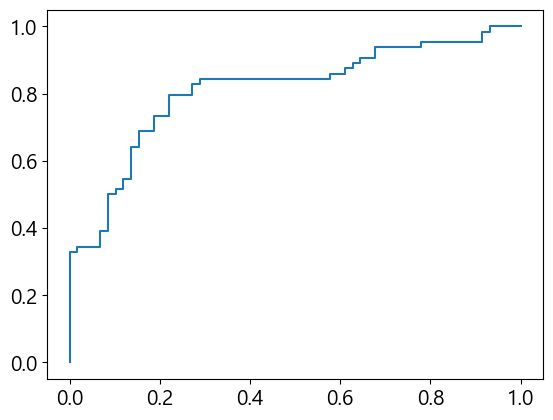

In [265]:
y_p_3=cs_xc_3.predict_proba(x_test)
x,y,N=roc_curve(y_test,y_p_3[:,1])
plt.plot(x,y)

In [266]:
print('auc는: ',roc_auc_score(y_test, y_p_3[:,1]))

auc는:  0.8117055084745762


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

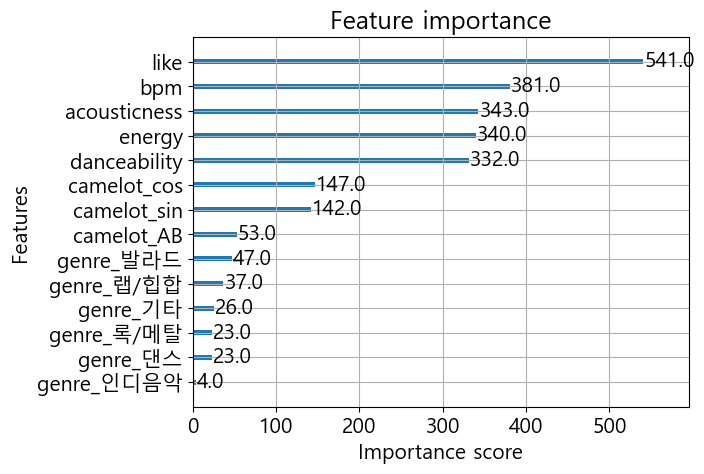

In [269]:
plot_importance(cs_xc_3)

# 1-2. SIN-COS인코딩 XGBOOST

# !!!!!!!!!!!!!!!!!이게 best!!!!!!!!!!!!

In [41]:
xgb2 = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Define parameter grid to sample from
params = params = {'colsample_bytree': [0.5, 0.7, 1], #각 트리 생성 시 사용하는 feature 비율
                      'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], #값이 낮을수록 학습이 느리지만 일반화 성능 좋음
                      'max_depth' : randint(5,15),
                      'min_child_weight' : [1, 3, 5], #자식 노드 분할을 결정하는 최소 가중치의 합 -> 작으면 더 만흥 자식 노드 분할
                      'n_estimators' : [100, 200, 300,500]}
rs2=RandomizedSearchCV(xgb2,param_distributions=params,n_iter=300,n_jobs=-1)
rs2.fit(x_train,y_train)
rs2.best_params_, np.max(rs2.cv_results_['mean_test_score'])

({'subsample': 1.0,
  'reg_lambda': 5,
  'reg_alpha': 0.1,
  'n_estimators': 100,
  'max_depth': 6,
  'learning_rate': 0.3,
  'gamma': 0.2,
  'colsample_bytree': 1.0},
 0.7393939393939395)

In [42]:
xgb2=rs2.best_estimator_
xgb2.score(x_test,y_test)

0.7235772357723578

auc는:  0.8233580508474576


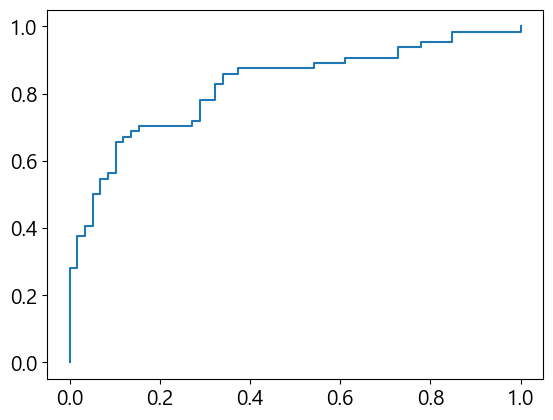

In [43]:
y_p_2=xgb2.predict_proba(x_test)
x,y,N=roc_curve(y_test,y_p_2[:,1])
plt.plot(x,y)
print('auc는: ',roc_auc_score(y_test, y_p_2[:,1]))

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

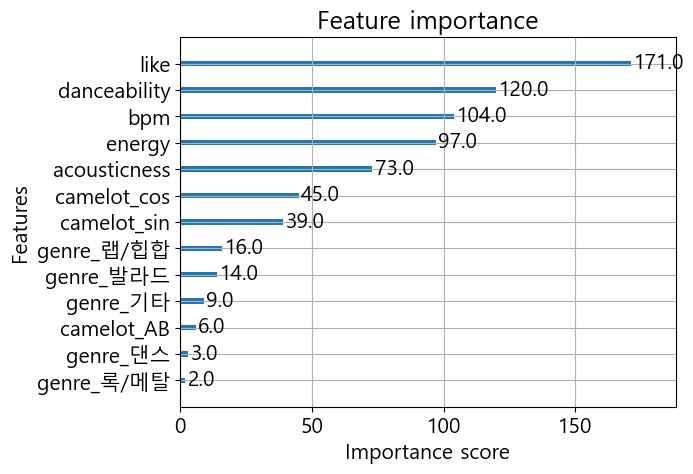

In [59]:
plot_importance(xgb2)

In [81]:
xgb2.score(x_test,y_test)

0.7235772357723578

In [45]:
import pickle
f=open('./model_823.pickle','wb')
pickle.dump(xgb2,f)
f.close()

In [57]:
import pickle
f=open('./xgb10.pickle','wb')
pickle.dump(xgb2,f)
f.close()

# 행별 가중치 달리하기-> 별 차이 없음

In [61]:
df=pd.read_csv('./final_chart_in_out.csv',encoding='utf-8')
def camelot_sin(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.sin(angle)
def camelot_cos(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.cos(angle)
def number(x):
    return int(x[:-1])
def get_str(x):
    return 0 if x[-1]=='A' else 1
df['camelot_sin']=np.round(df['camelot'].apply(number).apply(camelot_sin),2)
df['camelot_cos']=np.round(df['camelot'].apply(number).apply(camelot_cos),2)
df['camelot_AB']=df['camelot'].apply(get_str)
df['year_y']=df['year_y'].astype('int')
df=df[df['year_y'].isin([2024,2023,2022])]
np.unique(df['year_y'],return_counts=True)
df=pd.get_dummies(df,columns=['genre'],drop_first=True,dtype='int')
df['target']=df['classes']
df.drop(columns=['year_y','classes'],inplace=True)
df.drop(columns=['camelot'],inplace=True)
np.unique(df['target'],return_counts=True)
df.loc[df['target'] == 0, 'target'] = 99 
df.loc[df['target'] == 1, 'target'] = 0   
df.loc[df['target'] == 99, 'target'] = 1
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
df.head()

,artist_song,like,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스,target
193,IVE (아이브) LOVE DIVE,122601,118,71,70.0,0.0,-0.5,0.87,0,0,1,0,0,0,0,0,0,1
194,i-dle (아이들) TOMBOY,143106,124,87,76.0,1.0,-0.5,0.87,0,0,0,0,1,0,0,0,0,1
195,김민석 취중고백,21014,122,45,56.0,58.0,0.0,1.00,1,0,0,0,0,1,0,0,0,1
196,멜로망스 사랑인가 봐,88639,172,73,40.0,51.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1
197,임영웅 사랑은 늘 도망가,147432,131,44,40.0,65.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1


In [75]:
sample_weights = np.where(x_train['genre_록/메탈'] == 1, 100.0, 1.0)
xgb4 = XGBClassifier(eval_metric='auc',objective='binary:logistic',use_label_encoder=False)

# Define parameter grid to sample from
params = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],  # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3, 5]      # L2 regularization
}
rs4=RandomizedSearchCV(xgb4,param_distributions=params,n_iter=500,n_jobs=-1)
rs4.fit(x_train,y_train,sample_weight=sample_weights)
rs4.best_params_, np.max(rs4.cv_results_['mean_test_score'])

C:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


({'subsample': 0.9,
  'reg_lambda': 1,
  'reg_alpha': 0.01,
  'n_estimators': 200,
  'max_depth': 6,
  'learning_rate': 0.18,
  'gamma': 0.4,
  'colsample_bytree': 0.6},
 0.7310863739435168)

In [76]:
xgb4=rs4.best_estimator_
xgb4.score(x_test,y_test)

0.7317073170731707

auc는:  0.8016419491525424


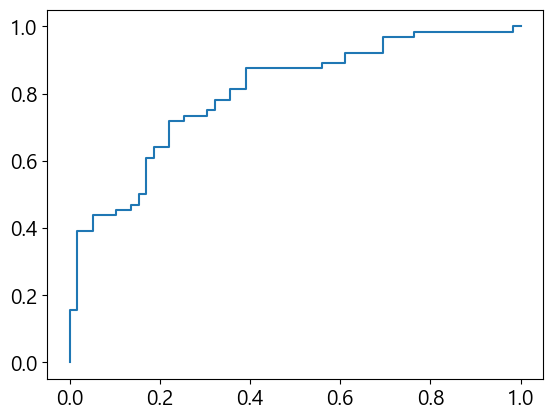

In [77]:
y_p_4=xgb4.predict_proba(x_test)
x,y,N=roc_curve(y_test,y_p_4[:,1])
plt.plot(x,y)
print('auc는: ',roc_auc_score(y_test, y_p_4[:,1]))

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

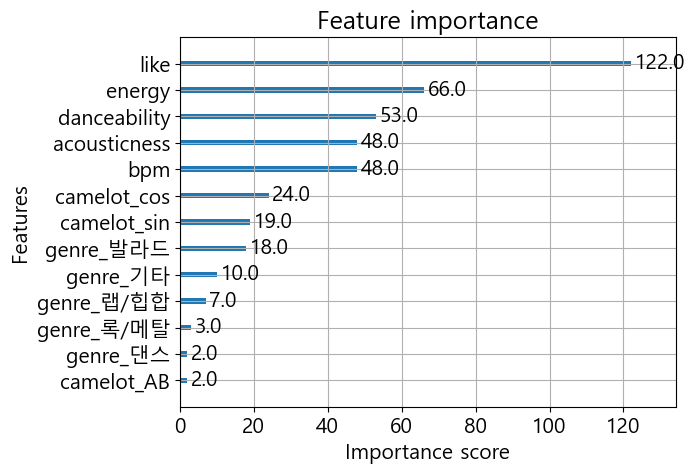

In [78]:
plot_importance(xgb3)

In [79]:
import pickle
f=open('./xgb100.pickle','wb')
pickle.dump(xgb2,f)
f.close()

# svm

In [120]:
cs_svc_3 = SVC(gamma='scale',kernel='rbf',probability=True)
params={'C' : loguniform(0.001,1000)} # 오차허용큼(일반화용) ~ 오차허용적음(과대적합 위험, 정확도는 좋음)
                
rs_svc_cs_3=RandomizedSearchCV(cs_svc_3 ,param_distributions=params,n_iter=100,n_jobs=-1)
rs_svc_cs_3.fit(x_train,y_train)
rs_svc_cs_3.best_params_, np.max(rs_svc_cs_3.cv_results_['mean_test_score'])

({'C': 0.030850118839723197}, 0.6517212945784373)

In [121]:
cs_svc_3=rs_svc_cs_3.best_estimator_
cs_svc_3.score(x_test,y_test)

0.6260162601626016

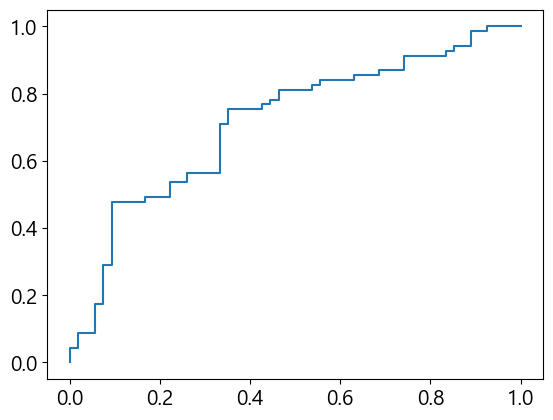

In [122]:
y_p_svm_3=cs_svc_3.predict_proba(x_test)
x,y,N=roc_curve(y_test,y_p_svm_3[:,1])
plt.plot(x,y)

In [123]:
print('auc는: ',roc_auc_score(y_test, y_p_svm_3[:,1]))

auc는:  0.7155126140633388


# 정규화

In [267]:
df

,artist_song,like,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스,target
193,IVE (아이브) LOVE DIVE,122601,118,71,70.0,0.0,-0.50,0.87,0,0,1,0,0,0,0,0,0,1
194,i-dle (아이들) TOMBOY,143106,124,87,76.0,1.0,-0.50,0.87,0,0,0,0,1,0,0,0,0,1
195,김민석 취중고백,21014,122,45,56.0,58.0,0.00,1.00,1,0,0,0,0,1,0,0,0,1
196,멜로망스 사랑인가 봐,88639,172,73,40.0,51.0,1.00,0.00,1,0,0,0,0,1,0,0,0,1
197,임영웅 사랑은 늘 도망가,147432,131,44,40.0,65.0,1.00,0.00,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),256554,63,67,26.0,0.0,-0.87,-0.50,0,0,0,0,0,0,0,1,0,0
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),6389,179,48,52.0,23.0,0.00,1.00,0,0,1,0,0,0,0,0,0,0
1231,연변대학최씨 바람이 불지 않은 것처럼,608,170,66,55.0,81.0,0.00,1.00,0,0,0,0,0,1,0,0,0,0
1232,츄 (CHUU) Strawberry Rush,11807,158,84,59.0,15.0,-1.00,-0.00,1,0,1,0,0,0,0,0,0,0


In [268]:
df['like']=df['like'].apply(np.log1p)

In [125]:
from sklearn.preprocessing import StandardScaler

In [270]:
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]

In [271]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
ss1=StandardScaler()
ss1.fit(x_train.iloc[:,1:5])
x_train.iloc[:,1:5]=ss1.transform(x_train.iloc[:,1:5])
x_test.iloc[:,1:5]=ss1.transform(x_test.iloc[:,1:5])

C:\Users\kkangwook\AppData\Local\Temp\ipykernel_5392\3767915586.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.03535095  1.87649853 -0.1138796  -1.29336293  1.5816277  -0.48246814
 -0.70362126  1.10246259 -0.04016189  0.25470895 -0.15073845 -1.21964522
  0.47586207 -1.84624575 -1.8831046   0.99188603  0.32842665  0.07041467
  0.03355582 -1.25650408  0.62329749 -1.40393949 -0.55618585 -1.03535095
  0.47586207 -0.81419783  0.18099124  0.77073291 -1.40393949 -0.1875973
  0.25470895 -1.03535095  0.07041467 -0.1138796  -1.10906866  0.40214436
  0.32842665 -2.03054002  1.80278082  1.72906312 -0.33503272  1.87649853
 -0.62990356  1.65534541  2.4662402  -0.07702074 -0.29817387  0.14413238
  0.03355582 -2.50970512 -1.62509262  0.62329749 -0.92477439 -0.5930447
 -0.66676241  0.99188603  0.36528551  2.09765166 -0.33503272 -0.22445616
  0.99188603 -0.1138796  -0.66676241  2.98226416  0.03355582 -0.9984921
  2.09765166

In [272]:
df

,artist_song,like,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스,target
193,IVE (아이브) LOVE DIVE,11.716699,118,71,70.0,0.0,-0.50,0.87,0,0,1,0,0,0,0,0,0,1
194,i-dle (아이들) TOMBOY,11.871348,124,87,76.0,1.0,-0.50,0.87,0,0,0,0,1,0,0,0,0,1
195,김민석 취중고백,9.952992,122,45,56.0,58.0,0.00,1.00,1,0,0,0,0,1,0,0,0,1
196,멜로망스 사랑인가 봐,11.392339,172,73,40.0,51.0,1.00,0.00,1,0,0,0,0,1,0,0,0,1
197,임영웅 사랑은 늘 도망가,11.901129,131,44,40.0,65.0,1.00,0.00,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),12.455098,63,67,26.0,0.0,-0.87,-0.50,0,0,0,0,0,0,0,1,0,0
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),8.762490,179,48,52.0,23.0,0.00,1.00,0,0,1,0,0,0,0,0,0,0
1231,연변대학최씨 바람이 불지 않은 것처럼,6.411818,170,66,55.0,81.0,0.00,1.00,0,0,0,0,0,1,0,0,0,0
1232,츄 (CHUU) Strawberry Rush,9.376533,158,84,59.0,15.0,-1.00,-0.00,1,0,1,0,0,0,0,0,0,0


In [128]:
df.iloc[:,]

,artist_song,like,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스,target
193,IVE (아이브) LOVE DIVE,11.716699,-0.173015,0.346839,0.599027,-1.111139,-0.50,0.87,0,0,1,0,0,0,0,0,0,1
194,i-dle (아이들) TOMBOY,11.871348,0.047153,1.182794,0.978727,-1.077714,-0.50,0.87,0,0,0,0,1,0,0,0,0,1
195,김민석 취중고백,9.952992,-0.026236,-1.011587,-0.286939,0.827515,0.00,1.00,1,0,0,0,0,1,0,0,0,1
196,멜로망스 사랑인가 봐,11.392339,1.808498,0.451334,-1.299473,0.593540,1.00,0.00,1,0,0,0,0,1,0,0,0,1
197,임영웅 사랑은 늘 도망가,11.901129,0.304016,-1.063834,-1.299473,1.061491,1.00,0.00,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),12.455098,-2.191222,0.137851,-2.185439,-1.111139,-0.87,-0.50,0,0,0,0,0,0,0,1,0,0
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),8.762490,2.065361,-0.854845,-0.540073,-0.342362,0.00,1.00,0,0,1,0,0,0,0,0,0,0
1231,연변대학최씨 바람이 불지 않은 것처럼,6.411818,1.735109,0.085604,-0.350223,1.596292,0.00,1.00,0,0,0,0,0,1,0,0,0,0
1232,츄 (CHUU) Strawberry Rush,9.376533,1.294772,1.026053,-0.097089,-0.609763,-1.00,-0.00,1,0,1,0,0,0,0,0,0,0


# 2-2. SVC SIN-COS인코딩

In [278]:
cs_svc_3 = SVC(gamma='scale',kernel='rbf',probability=True)
params={'C' : loguniform(0.001,1000)} # 오차허용큼(일반화용) ~ 오차허용적음(과대적합 위험, 정확도는 좋음)

rs_svc_cs_3=RandomizedSearchCV(cs_svc_3,param_distributions=params,n_iter=300,n_jobs=-1)
rs_svc_cs_3.fit(x_train,y_train)
rs_svc_cs_3.best_params_, np.max(rs_svc_cs_3.cv_results_['mean_test_score'])

({'C': 35.974834154327354}, 0.7068027210884354)

In [279]:
cs_svc_3=rs_svc_cs_3.best_estimator_
cs_svc_3.score(x_test,y_test)

0.6991869918699187

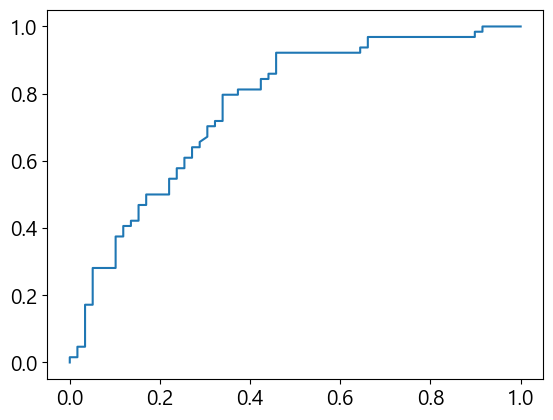

In [280]:
y_p_svm_3=cs_svc_3.predict_proba(x_test)
x,y,N=roc_curve(y_test,y_p_svm_3[:,1])
plt.plot(x,y)

In [281]:
print('auc는: ',roc_auc_score(y_test, y_p_svm_3[:,1]))

auc는:  0.7639036016949152


# 결론:
# xgboost, svm중에 svm이 더 잘나오고
# ohe, sin-cos 인코딩중에 sin-cos인코딩이 더 잘나오고
# like에 제일높은 가중치를 주기위해 log1p스켈일링하고 나머지는 standard scaler
- XGBoost는 큰 데이터셋에 더 강점을 보이고, 작은 데이터에서는 오히려 과적합을 일으킬 수도 있음 반면 SVC는 적은 feature와 적은 row에 더 안정적으로 작동할 수 있음
- 클래스가 깔끔하게 분리되면 (특히 정규화된 feature에서) SVC가 뛰어난 성능을 보일 수 있음
- AUC가 0.81

분류 성능으로 보자면 "상당히 우수한 편"
(보통 0.7: 보통, 0.8 이상: 좋음, 0.9 이상: 매우 뛰어남)

In [283]:
import pickle

In [284]:
f=open('./best_xgbc_model.pickle','wb')
pickle.dump(cs_xc_3,f)
f.close()

In [291]:
f=open('./s_scaler.pickle','wb')
pickle.dump(ss,f)
f.close()

# hist gradient boosting쓰기

In [12]:
import numpy as np

In [13]:
df=pd.read_csv('./final_chart_in_out.csv',encoding='utf-8')
def camelot_sin(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.sin(angle)
def camelot_cos(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.cos(angle)
def number(x):
    return int(x[:-1])
def get_str(x):
    return 0 if x[-1]=='A' else 1
df['camelot_sin']=np.round(df['camelot'].apply(number).apply(camelot_sin),2)
df['camelot_cos']=np.round(df['camelot'].apply(number).apply(camelot_cos),2)
df['camelot_AB']=df['camelot'].apply(get_str)
df['year_y']=df['year_y'].astype('int')
df=df[df['year_y'].isin([2024,2023,2022])]
np.unique(df['year_y'],return_counts=True)
df=pd.get_dummies(df,columns=['genre'],drop_first=True,dtype='int')
df['target']=df['classes']
df.drop(columns=['year_y','classes'],inplace=True)
df.drop(columns=['camelot'],inplace=True)
np.unique(df['target'],return_counts=True)
df.loc[df['target'] == 0, 'target'] = 99 
df.loc[df['target'] == 1, 'target'] = 0   
df.loc[df['target'] == 99, 'target'] = 1
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
df.head()

,artist_song,like,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스,target
193,IVE (아이브) LOVE DIVE,122601,118,71,70.0,0.0,-0.5,0.87,0,0,1,0,0,0,0,0,0,1
194,i-dle (아이들) TOMBOY,143106,124,87,76.0,1.0,-0.5,0.87,0,0,0,0,1,0,0,0,0,1
195,김민석 취중고백,21014,122,45,56.0,58.0,0.0,1.00,1,0,0,0,0,1,0,0,0,1
196,멜로망스 사랑인가 봐,88639,172,73,40.0,51.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1
197,임영웅 사랑은 늘 도망가,147432,131,44,40.0,65.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1


In [9]:
from sklearn.ensemble import HistGradientBoostingClassifier

# 3. HIST-GRADIENT-BOOSTING  SIN-COS인코딩

In [10]:
hgc=HistGradientBoostingClassifier(random_state=123,max_iter=200)
params={'min_samples_leaf':randint(1,25),
                     'max_depth':randint(10,50),
                     'max_leaf_nodes':randint(10,50),
                     'learning_rate':uniform(0.1,0.2)}
hgc_rs=RandomizedSearchCV(hgc,param_distributions=params,n_iter=300,n_jobs=-1)
hgc_rs.fit(x_train,y_train)
hgc_rs.best_params_, np.max(hgc_rs.cv_results_['mean_test_score'])

({'learning_rate': 0.22368723136311153,
  'max_depth': 47,
  'max_leaf_nodes': 23,
  'min_samples_leaf': 1},
 0.7210884353741497)

In [11]:
hgc=hgc_rs.best_estimator_
hgc.score(x_test,y_test)

0.7235772357723578

auc는:  0.8101165254237288


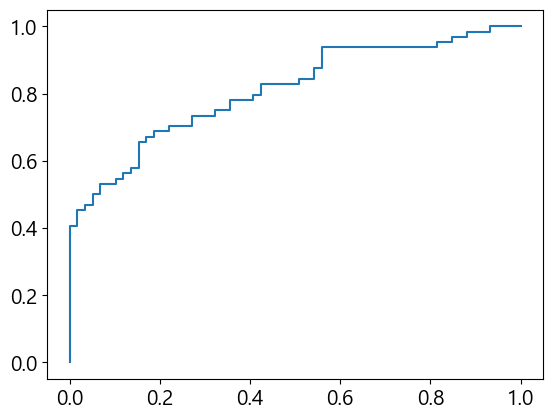

In [15]:
y_p_hgc=hgc.predict_proba(x_test)
x,y,N=roc_curve(y_test,y_p_hgc[:,1])
plt.plot(x,y)
print('auc는: ',roc_auc_score(y_test, y_p_hgc[:,1]))

# 4.ligthGBM

In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import lightgbm as lgb

In [22]:
lgb_clf = lgb.LGBMClassifier(objective='binary')
params= {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10, -1],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}
lgb_rs=RandomizedSearchCV(lgb_clf,param_distributions=params,n_iter=100,n_jobs=-1)
lgb_rs.fit(x_train,y_train)
lgb_rs.best_params_, np.max(lgb_rs.cv_results_['mean_test_score'])

[LightGBM] [Info] Number of positive: 226, number of negative: 265
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460285 -> initscore=-0.159195
[LightGBM] [Info] Start training from score -0.159195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

({'subsample': 0.8,
  'num_leaves': 63,
  'n_estimators': 200,
  'min_child_samples': 10,
  'max_depth': 10,
  'learning_rate': 0.2,
  'colsample_bytree': 0.6},
 0.7230674087816945)

In [23]:
lgb=lgb_rs.best_estimator_
lgb.score(x_test,y_test)

0.7235772357723578

auc는:  0.8127648305084745


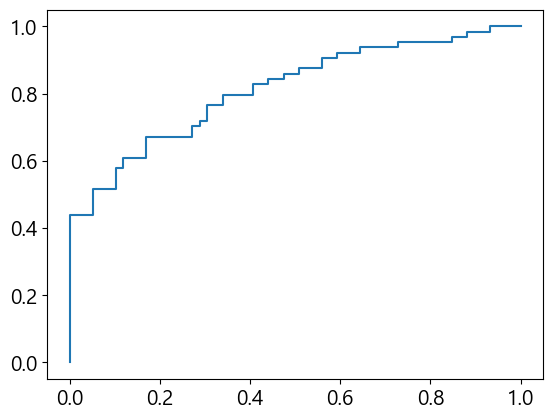

In [24]:
y_p_lgb=lgb.predict_proba(x_test)
x,y,N=roc_curve(y_test,y_p_lgb[:,1])
plt.plot(x,y)
print('auc는: ',roc_auc_score(y_test, y_p_lgb[:,1]))

# weight 다르게 하기

In [285]:
df=pd.read_csv('./final_chart_in_out.csv',encoding='utf-8')
def camelot_sin(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.sin(angle)
def camelot_cos(x):
    angle = 2 * np.pi * (x - 1) / 12
    return np.cos(angle)
def number(x):
    return int(x[:-1])
def get_str(x):
    return 0 if x[-1]=='A' else 1
df['camelot_sin']=np.round(df['camelot'].apply(number).apply(camelot_sin),2)
df['camelot_cos']=np.round(df['camelot'].apply(number).apply(camelot_cos),2)
df['camelot_AB']=df['camelot'].apply(get_str)
df['year_y']=df['year_y'].astype('int')
df=df[df['year_y'].isin([2024,2023,2022])]
np.unique(df['year_y'],return_counts=True)
df=pd.get_dummies(df,columns=['genre'],drop_first=True,dtype='int')
df['target']=df['classes']
df.drop(columns=['year_y','classes'],inplace=True)
df.drop(columns=['camelot'],inplace=True)
np.unique(df['target'],return_counts=True)
df.loc[df['target'] == 0, 'target'] = 99 
df.loc[df['target'] == 1, 'target'] = 0   
df.loc[df['target'] == 99, 'target'] = 1
x=df.iloc[:,1:-1]; y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
df.head()

,artist_song,like,bpm,energy,danceability,acousticness,camelot_sin,camelot_cos,camelot_AB,genre_기타,genre_댄스,genre_랩/힙합,genre_록/메탈,genre_발라드,genre_성인가요/트로트,genre_인디음악,genre_포크/블루스,target
193,IVE (아이브) LOVE DIVE,122601,118,71,70.0,0.0,-0.5,0.87,0,0,1,0,0,0,0,0,0,1
194,i-dle (아이들) TOMBOY,143106,124,87,76.0,1.0,-0.5,0.87,0,0,0,0,1,0,0,0,0,1
195,김민석 취중고백,21014,122,45,56.0,58.0,0.0,1.00,1,0,0,0,0,1,0,0,0,1
196,멜로망스 사랑인가 봐,88639,172,73,40.0,51.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1
197,임영웅 사랑은 늘 도망가,147432,131,44,40.0,65.0,1.0,0.00,1,0,0,0,0,1,0,0,0,1


In [7]:
weights = np.array([
    1.0,  # 샘플 0
    1.0,  # 샘플 1
    2.0,  # 샘플 2 (중요하다고 판단되어 2배 가중치)
    0.5,  # 샘플 3 (신뢰 낮아서 0.5배)
    1.0,
    1.0,
    1.0,
    1.5,  # 샘플 7 (특정 조건 만족해서 1.5배)
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0
])

In [ ]:
rs1.fit()

In [ ]:
plot_importance(xg1)